In [11]:
from cmath import sqrt
import numpy as np
from autograd import grad
import autograd.numpy as np1
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
from scipy.optimize import BFGS,SR1
from scipy.optimize import Bounds
from scipy.optimize import NonlinearConstraint,LinearConstraint

In [12]:
n = 20
a = np.random.rand(1,n)
beta =  0.741271
e = np.array([i for i in range(n)])
A = np.random.rand(n,n)
b = np.random.rand(n,1)
alpha = 10*np.random.rand(1,1)
while 2*alpha <= 3*(beta)**(3/2)*sqrt(n):
    alpha = np.random.rand(1,1)

[1.06689021 1.06310101 1.09754892 1.07531626 1.06683732 1.01674945
 1.0350908  1.02463129 0.99900502 0.99135772 1.01307415 0.96398416
 0.99185725 0.9880903  0.94130542 0.9678478  0.95884011 0.92884233
 0.91586794 0.92201415]
[[144.12400677]]
[1.06689008 1.0631009  1.09754881 1.07531613 1.06683718 1.01674931
 1.03509065 1.02463115 0.99900486 0.99135756 1.01307401 0.96398401
 0.9918571  0.98809014 0.94130526 0.96784764 0.95883995 0.92884216
 0.91586778 0.92201399]
[[144.12397485]]


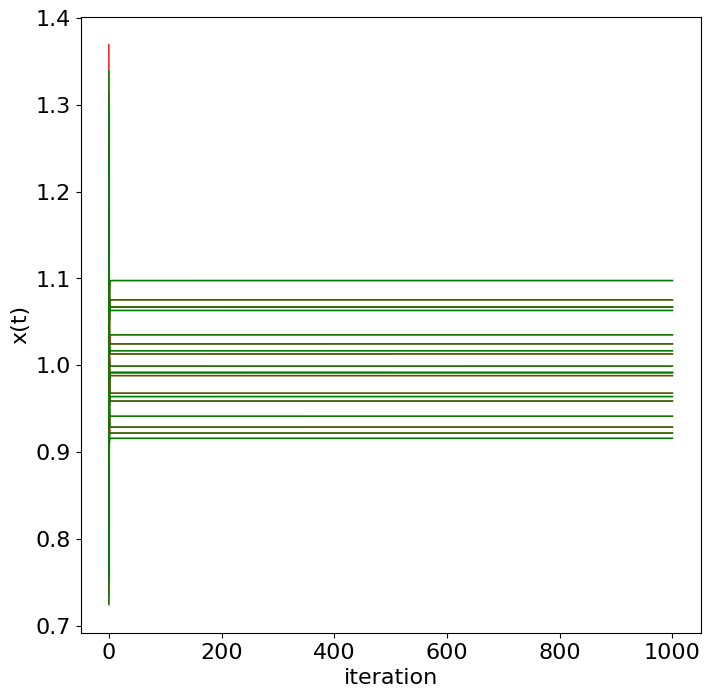

In [13]:

def f(x):
    return np1.dot(a,x.T) + alpha*np1.dot(x,x.T) + (beta/np1.sqrt(1+beta*np1.dot(x,x.T)))*np1.dot(e,x.T)
def g1(x):
    return 1- np1.prod(x)
def g2(x):
    return 1 - np1.sum(x)
g1_dx = grad(g1)
g2_dx = grad(g2)
f_dx = grad(f)
B = A.tolist()
C = b.reshape(1,n).tolist()[0]
nonlinear_constraint = NonlinearConstraint(g1, -np.inf, 0, jac=g1_dx, hess=BFGS())
bounds = Bounds([0.0001 for i in range(n)], [np.inf for i in range(n)])
def rosen(x,y):
    """The Rosenbrock function"""
    return np.sqrt(np.sum((x-y)**2))
def find_min(y,n):
    x = np.random.rand(1,n).tolist()[0]
    res = minimize(rosen, x, args=(y), jac="2-point",hess=BFGS(),
            constraints=[nonlinear_constraint],method='trust-constr', options={'disp': False},bounds = bounds)
    return res.x
def run_nonsmooth1(x, max_iters, f, f_dx,n):
    res = []
    val = []
    lda = 0.1 #1e9
    sigma = 0.1 #100
    K = np.random.rand(1,1)
    res.append(x)
    val.append(f(x))
    x_pre = x
    for t in range(max_iters):
        y = x - lda*f_dx(x)
        x_pre = x.copy()
        x = find_min(y,n)
        if f(x) - f(x_pre) + sigma*(np.dot(f_dx(x_pre).T,x_pre - x)) <= 0:
            lda = lda
        else:
            lda = K*lda
        res.append(x)
        val.append(f(x))
    print(x)
    print(f(x))
    return res,val,x,f(x)
def plot_x(sol_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    colors = ['r','g','y','b','brown']
    for i in range(count):
        for j in range(n):
            plt.plot(t, sol_all[i][:,j],color=colors[i],linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('x(t)')
    #plt.legend([r'$x_{1}(t)$',r'$x_{2}(t)$']) #,r'$x_{3}(t)$',r'$x_{4}(t)$'
    plt.show()

num = 2 # number of init points
max_iters = 1000 # number of interations
max_iters1 = 1000
sol_all,sol_all1 = [],[]
val_all,val_all1 = [],[]
count = 0
epsilon = 0.1
#n = 22 # dimension x
for i in range(num):
    x0 = np.random.rand(1,n)
    x0 = find_min(x0,n) # init point
    g1x = g1(x0)
    count += 1
    res,val,x,_ = run_nonsmooth1(x0, max_iters, f, f_dx,n)
    tmp = np.array(res)[:,:]
    sol_all.append(tmp)
    val_all.append(val)
plot_x(sol_all,count,max_iters)
def rosen(x):
    d = np.array([0.2,0.8])
    F = np.array([x[0],(x[0]-1)**2])
    return np.max(d*F)
def find_min(n):
    x = np.random.rand(1,n).tolist()[0]
    bounds = Bounds([0 for i in range(n)], [1 for i in range(n)])
    res = minimize(rosen, x, jac="2-point",hess=BFGS(),method='trust-constr', options={'disp': False},bounds = bounds)
    return res.x